# Importing needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from xgboost import XGBClassifier
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import shutil
import keras_tuner as kt

# Reading CSV file

In [3]:
data=pd.read_csv('Music classification.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# Reducing the number of rows by taking a 500 sample of each music genre 

In [4]:
data.music_genre.value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

Dropping Null rows as there are 5 fully empty rows in the dataset

In [5]:
data.dropna(inplace=True) 

In [6]:
df1=data.iloc[0:500]
df2=data.iloc[5000:5500]
df3=data.iloc[10000:10500]
df4=data.iloc[15000:15500]
df5=data.iloc[20000:20500]
df6=data.iloc[25000:25500]
df7=data.iloc[30000:30500]
df8=data.iloc[35000:35500]
df9=data.iloc[40000:40500]
df10=data.iloc[45000:45500]
frames = [df1, df2,df3,df4,df5,df6,df7,df8,df9,df10]
music = pd.concat(frames)

In [7]:
music.music_genre.value_counts()

Electronic     500
Anime          500
Jazz           500
Alternative    500
Country        500
Rap            500
Blues          500
Rock           500
Classical      500
Hip-Hop        500
Name: music_genre, dtype: int64

# Exploring , cleaning  and new feature extracting from the data

In [8]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [9]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 45504
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5000 non-null   float64
 1   artist_name       5000 non-null   object 
 2   track_name        5000 non-null   object 
 3   popularity        5000 non-null   float64
 4   acousticness      5000 non-null   float64
 5   danceability      5000 non-null   float64
 6   duration_ms       5000 non-null   float64
 7   energy            5000 non-null   float64
 8   instrumentalness  5000 non-null   float64
 9   key               5000 non-null   object 
 10  liveness          5000 non-null   float64
 11  loudness          5000 non-null   float64
 12  mode              5000 non-null   object 
 13  speechiness       5000 non-null   float64
 14  tempo             5000 non-null   object 
 15  obtained_date     5000 non-null   object 
 16  valence           5000 non-null   float64

In [10]:
music.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,55987.87340,44.169200,0.308806,0.557086,2.227667e+05,0.597700,0.177625,0.192831,-9.082591,0.093836,0.455332
std,20717.24584,15.538457,0.341221,0.177315,1.311903e+05,0.262145,0.322213,0.159199,6.089442,0.099732,0.245372
min,20009.00000,0.000000,0.000002,0.060600,-1.000000e+00,0.000900,0.000000,0.019100,-46.985000,0.022500,0.000000
25%,38106.00000,34.000000,0.020475,0.442000,1.736555e+05,0.435000,0.000000,0.097000,-10.858500,0.036000,0.254750
50%,55719.50000,45.000000,0.152000,0.566000,2.187865e+05,0.639000,0.000159,0.126000,-7.200000,0.049100,0.451000
75%,73917.50000,55.000000,0.557000,0.685250,2.721355e+05,0.812000,0.143250,0.245000,-5.162000,0.099600,0.643000
max,91754.00000,97.000000,0.996000,0.977000,1.418213e+06,0.998000,0.985000,0.984000,0.730000,0.817000,0.985000


In [11]:
data.music_genre.value_counts().index

Index(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues',
       'Rock', 'Classical', 'Hip-Hop'],
      dtype='object')

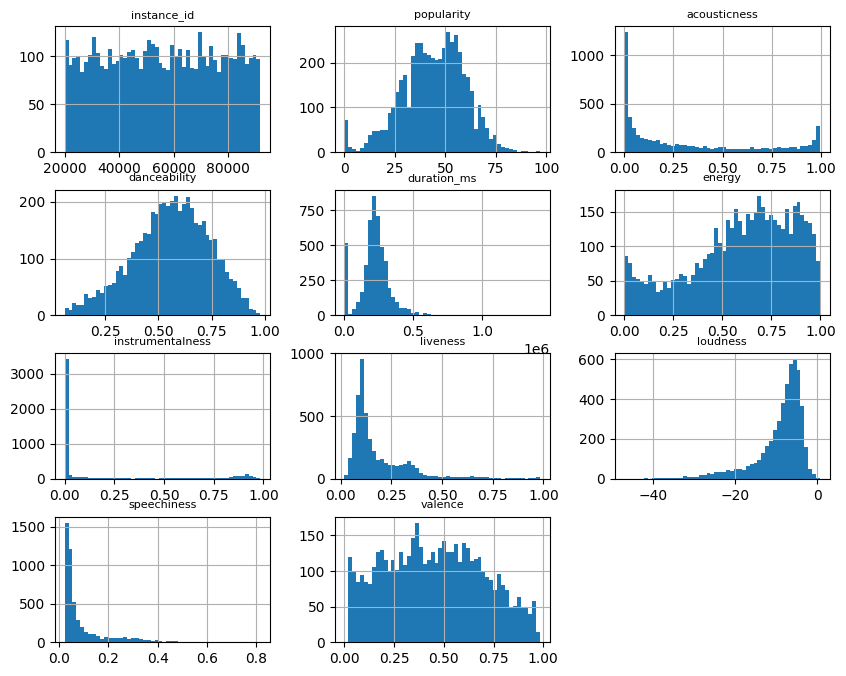

In [12]:
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=6)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

music.hist(bins=50, figsize=(10, 8))

plt.show()

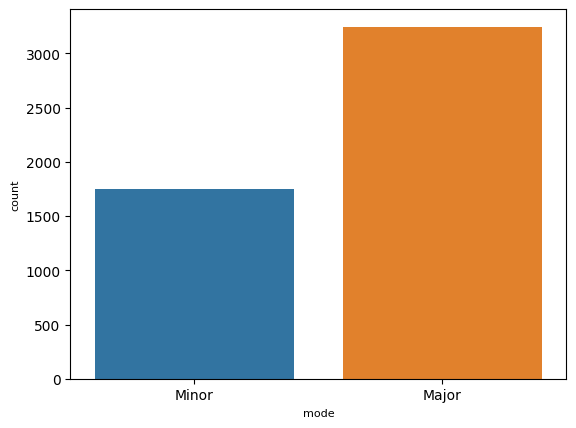

In [13]:
sns.countplot(x='mode',data=music)
plt.show()

Converting the time from milliseconds to seconds and setting the -1 value to null value as there is no time in negative

In [14]:
music["duration_ms"]=music["duration_ms"]/1000
music.rename(columns = {'duration_ms':'duration'}, inplace = True)
music['duration'].replace({-0.001: np.nan},inplace =True)

Changing tempo to float attribute and replacing '?' instances with null values

In [15]:
music['tempo'].replace({'?': np.nan},inplace =True)
convert_dict = {
                'tempo': float
                }
 
music = music.astype(convert_dict)

Extracting a new feature that is artist genre which is the music genre that each artist produces

In [17]:
def art_genre(df):
    for row_label in df.index:
        art_genre = np.unique(df[df['artist_name'] == df.loc[row_label,'artist_name']]['music_genre'])
        #adding art_genre column in data
        df.loc[row_label,'art_genre'] = str(art_genre)
    return df
(art_genre(music))

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,art_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,NaN,0.941,0.792000,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,['Alternative' 'Electronic']
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218.293,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic,['Electronic' 'Jazz']
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215.613,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,['Electronic']
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166.875,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,['Electronic']
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222.369,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,['Electronic']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45500,42863.0,Cooliecut,Over the Rainbow,66.0,0.01140,0.709,166.000,0.702,0.000323,D,0.387,-7.490,Major,0.0714,NaN,4-Apr,0.613,Hip-Hop,['Hip-Hop']
45501,52981.0,Future,I Won,60.0,0.74300,0.606,239.733,0.660,0.000000,A,0.396,-5.788,Major,0.2580,83.746,4-Apr,0.317,Hip-Hop,['Hip-Hop' 'Rap']
45502,50330.0,Lil Peep,Falling Down - Bonus Track,87.0,0.01750,0.669,196.400,0.574,0.002940,E,0.146,-6.442,Minor,0.0286,120.013,4-Apr,0.273,Hip-Hop,['Hip-Hop' 'Rap']
45503,90806.0,Eminem,Groundhog Day,53.0,0.32200,0.732,293.423,0.791,0.000000,C#,0.710,-1.865,Major,0.2400,81.972,4-Apr,0.560,Hip-Hop,['Hip-Hop' 'Rap']


Number of art genres 

In [18]:
music['art_genre'].nunique()

39

# Transformation Pipelines

Checking for NULL values to see if we need an imputer in the pipeline

In [19]:
music.isnull().sum()

instance_id           0
artist_name           0
track_name            0
popularity            0
acousticness          0
danceability          0
duration            510
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               512
obtained_date         0
valence               0
music_genre           0
art_genre             0
dtype: int64

Setting the strategy for the pipeline

In [20]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("standardize", StandardScaler()),
])

We did not use the imputer in the catagorical pipeline because there are no NULL values in them 

In [21]:
cat_pipeline = make_pipeline(OrdinalEncoder())

Combine the two pipelines using ColumnTransformer

In [22]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [23]:
music_prepared=preprocessing.fit_transform(music)

Converting the prepared data to a data frame

In [24]:
Music= pd.DataFrame(
    music_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=music.index)

Renaming the columns names

In [25]:
Music.rename(columns = {'pipeline-1__popularity':'popularity'}, inplace = True)
Music.rename(columns = {'pipeline-1__acousticness':'acousticness'}, inplace = True)
Music.rename(columns = {'pipeline-1__danceability':'danceability'}, inplace = True)
Music.rename(columns = {'pipeline-1__duration':'duration'}, inplace = True)
Music.rename(columns = {'pipeline-1__energy':'energy'}, inplace = True)
Music.rename(columns = {'pipeline-1__instrumentalness':'instrumentalness'}, inplace = True)
Music.rename(columns = {'pipeline-1__liveness':'liveness'}, inplace = True)
Music.rename(columns = {'pipeline-1__loudness':'loudness'}, inplace = True)
Music.rename(columns = {'pipeline-1__speechiness':'speechiness'}, inplace = True)
Music.rename(columns = {'pipeline-1__tempo':'tempo'}, inplace = True)
Music.rename(columns = {'pipeline-1__valence':'valence'}, inplace = True)
Music.rename(columns = {'pipeline-2__artist_name':'artist_name'}, inplace = True)
Music.rename(columns = {'pipeline-2__key':'key'}, inplace = True)
Music.rename(columns = {'pipeline-2__mode':'mode'}, inplace = True)
Music.rename(columns = {'pipeline-2__music_genre':'music_genre'}, inplace = True)
Music.rename(columns = {'pipeline-2__art_genre':'art_genre'}, inplace = True)

# Corrolation

In [26]:
corr_matrix = Music.corr()
corr_matrix["music_genre"].sort_values(ascending=False)

music_genre                  1.000000
pipeline-2__art_genre        0.655895
popularity                   0.503707
danceability                 0.301472
speechiness                  0.190747
loudness                     0.100919
valence                      0.069343
mode                         0.054358
pipeline-2__obtained_date    0.050691
energy                       0.034441
key                         -0.005875
pipeline-1__instance_id     -0.007707
artist_name                 -0.011500
liveness                    -0.011821
duration                    -0.027812
tempo                       -0.037874
pipeline-2__track_name      -0.057335
acousticness                -0.091944
instrumentalness            -0.110738
Name: music_genre, dtype: float64

Dropping some low correlations

In [27]:
Music=Music.drop(['pipeline-1__instance_id'],axis=1) 
Music=Music.drop(['pipeline-2__obtained_date'],axis=1)
Music=Music.drop(['pipeline-2__track_name'],axis=1)

This figure shows the relation between the music genre with the energy and loudness levels

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

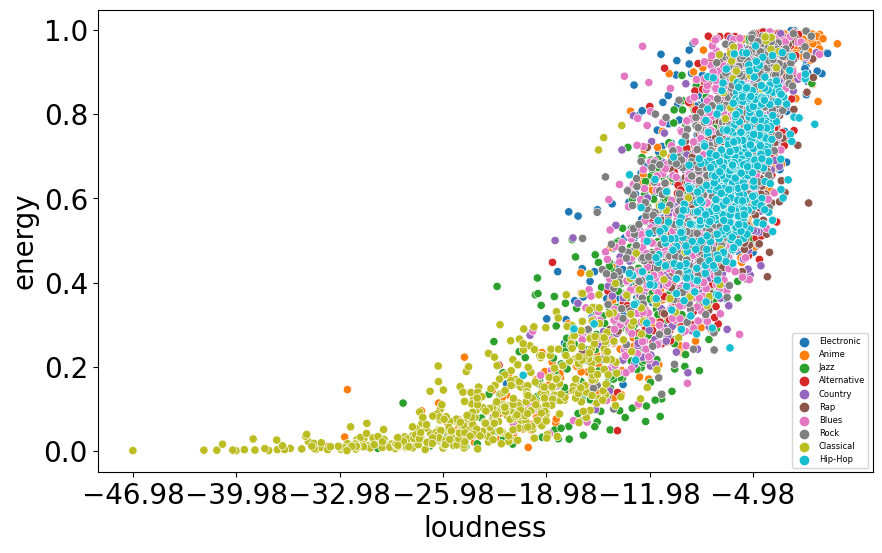

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='loudness', y='energy', data=music, hue='music_genre',sizes=(5, 10), legend="full")
plt.legend(loc=4, prop={'size': 6})
plt.xlabel("loudness", size=20)
plt.ylabel("energy", size=20)
plt.xticks( np.arange(min(music['loudness']),max(music['loudness']),7),size=20)
plt.yticks( size=20)

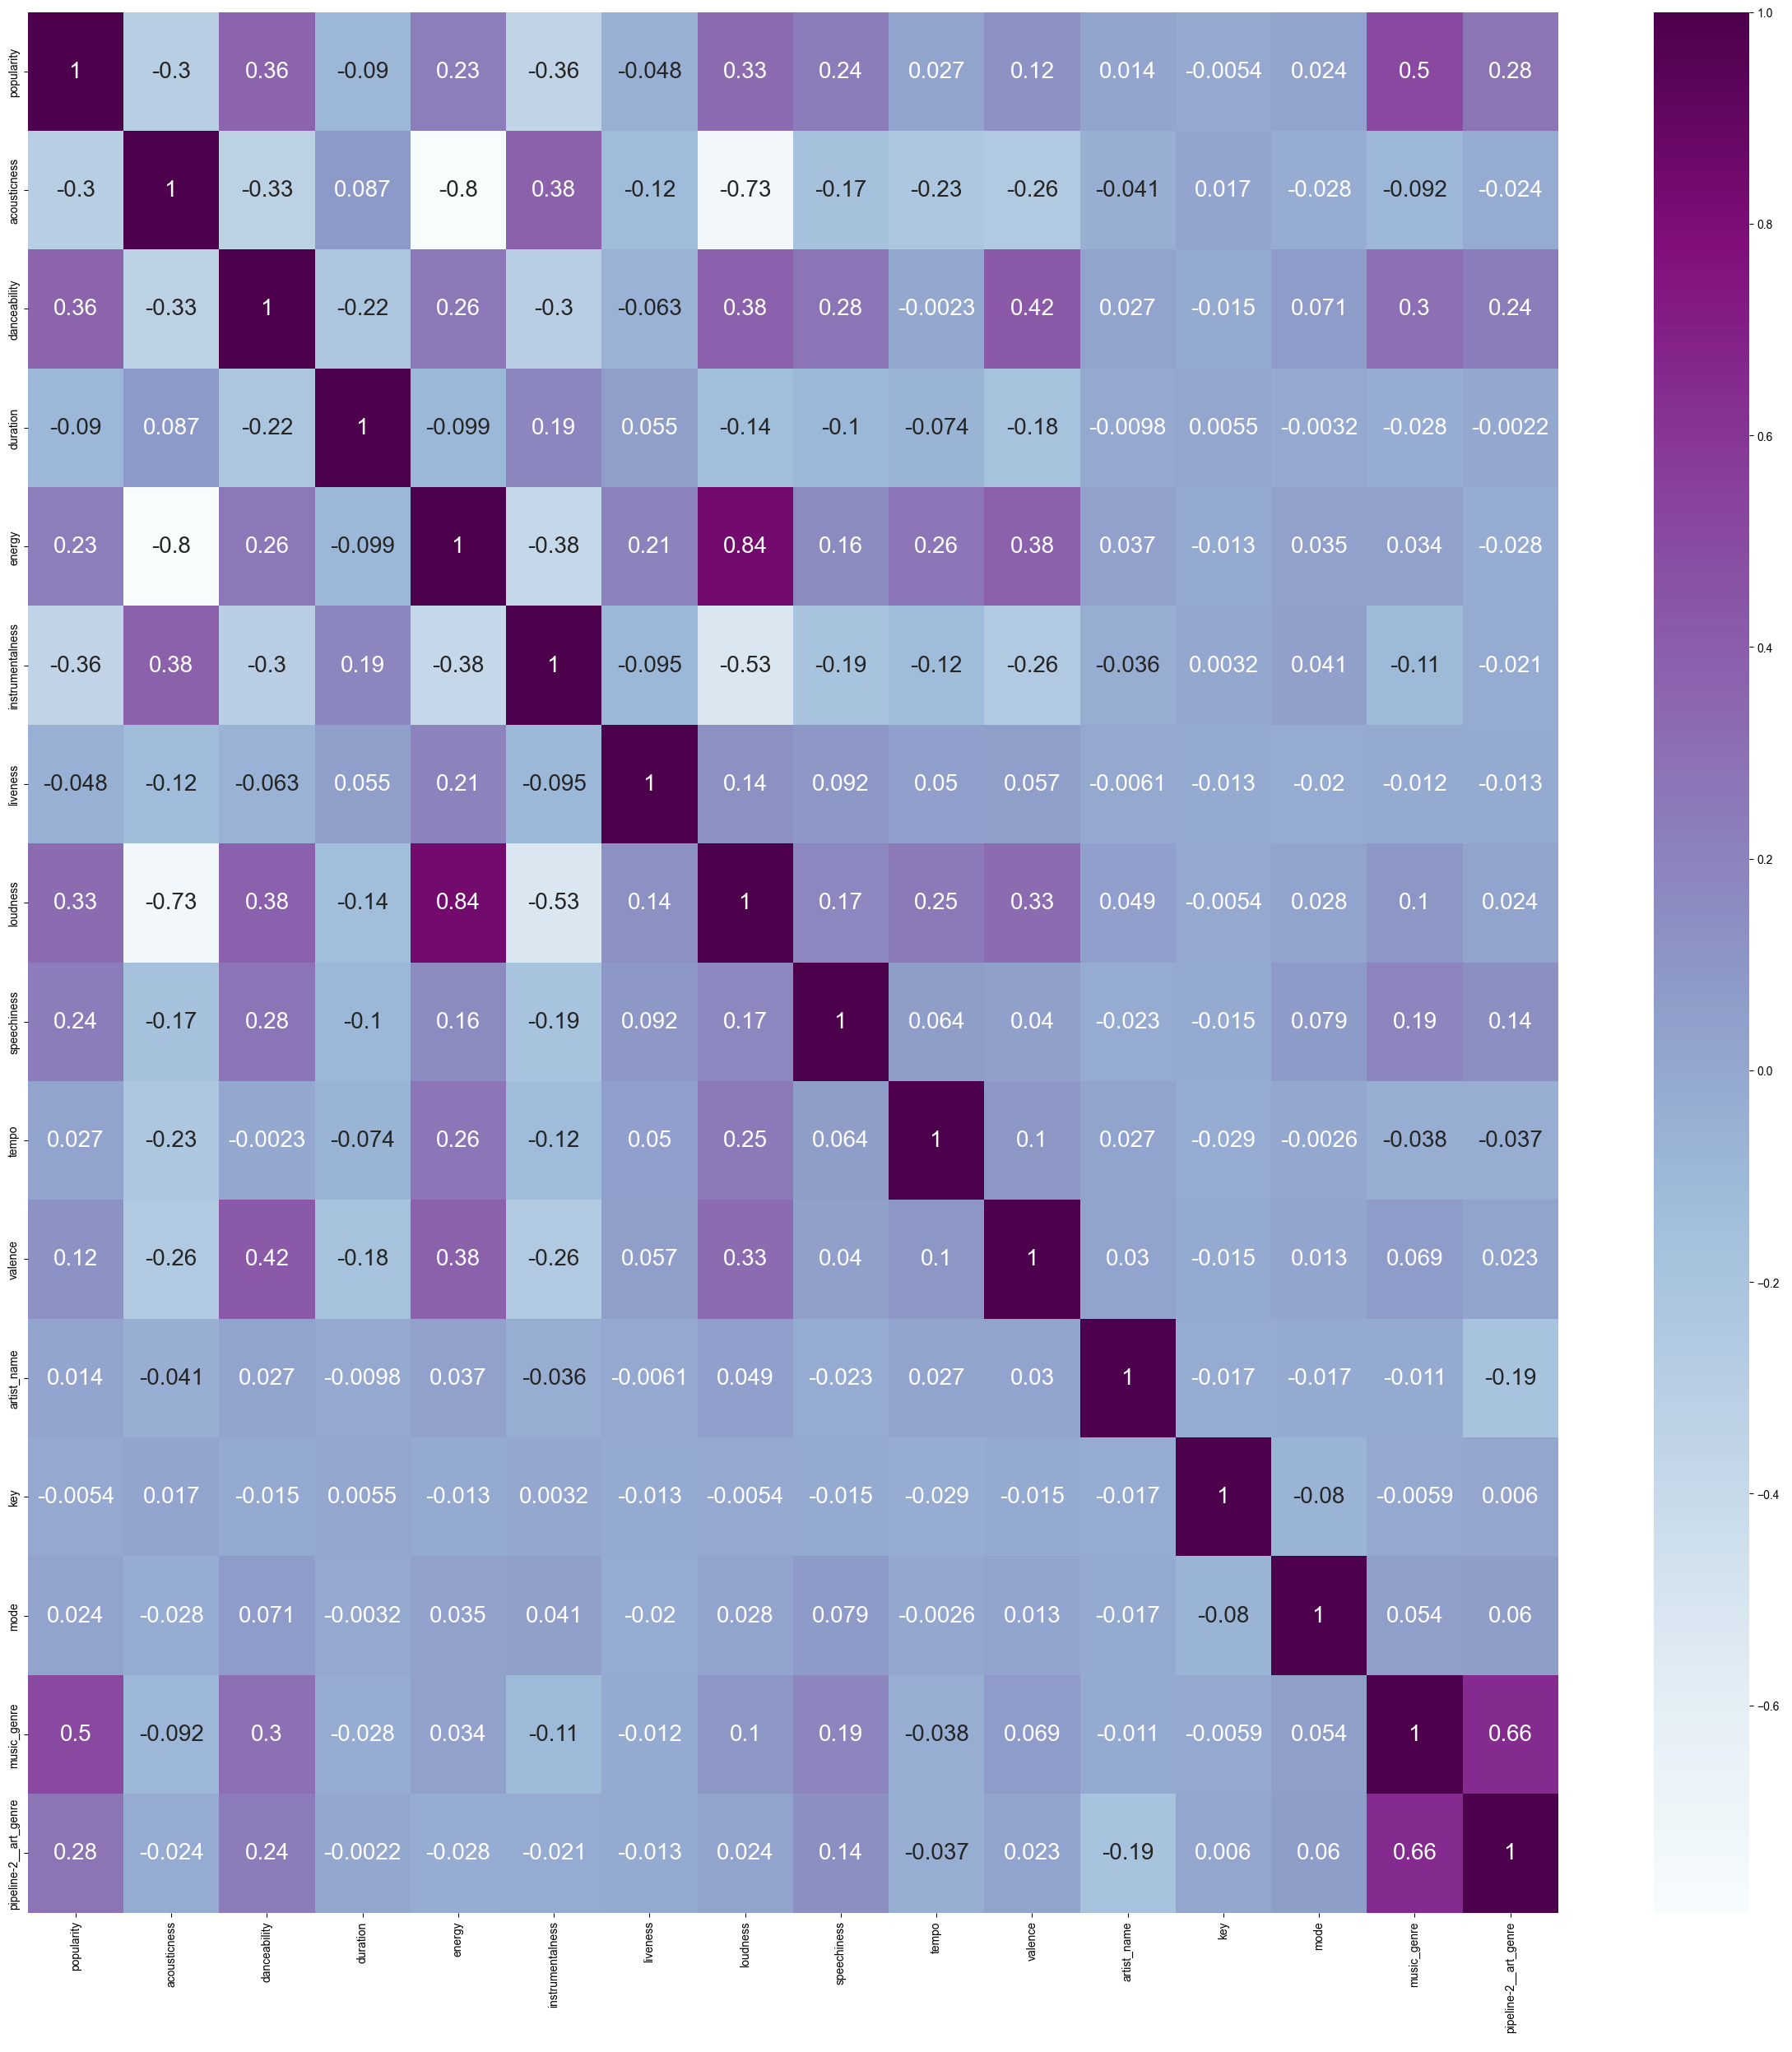

In [29]:
plt.figure(figsize=(30,30))
sns.heatmap(Music.corr(),annot=True,cmap="BuPu",annot_kws={'size': 20})
sns.set(font_scale=5)

# Splitting and Shuffling the data

In [30]:
train_set, test_set, train_labels, test_labels = train_test_split(Music, Music['music_genre'], test_size=0.10,
                                                                  random_state=42,shuffle=True, stratify=Music['music_genre'])

In [31]:
test_set.drop(test_set[['music_genre']],axis=1,inplace=True)
train_set.drop(train_set[['music_genre']],axis=1,inplace=True)

In [32]:
print(train_set.shape)
print(test_set.shape)
print(train_labels.shape)
print(test_labels.shape)

(4500, 15)
(500, 15)
(4500,)
(500,)


# Training the data using different classifiers

In [33]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_neighbors=7,algorithm='brute',n_jobs=-1)
KNN_Classifier.fit(train_set, train_labels)

# Train KNeighborsClassifier Model with different parameters
KNN_Classifier_2 = KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='kd_tree',leaf_size=40,n_jobs=-1)
KNN_Classifier_2.fit(train_set, train_labels)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(max_iter=250,solver='liblinear',n_jobs=-1)
LGR_Classifier.fit(train_set, train_labels)

# Train LogisticRegression Model with different parameters
LGR_Classifier_2 = LogisticRegression(max_iter=150,solver='liblinear',verbose=1,n_jobs=-1)
LGR_Classifier_2.fit(train_set, train_labels)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion= 'entropy',max_depth=800,random_state=42,min_samples_split=500)
DTC_Classifier.fit(train_set, train_labels)

# Train Decision Tree Model with different parameters
DTC_Classifier_2 = tree.DecisionTreeClassifier(criterion= 'log_loss',max_depth=600,random_state=42,min_samples_split=500,min_samples_leaf=2)
DTC_Classifier_2.fit(train_set, train_labels)

# Train RandomForestClassifier Model
RF_Classifier = RandomForestClassifier(n_estimators = 35, max_depth = 15, min_samples_leaf = 4)
RF_Classifier.fit(train_set, train_labels) 

# Train RandomForestClassifier Model with different parameters
RF_Classifier_2 = RandomForestClassifier(n_estimators = 70, max_depth = 30, min_samples_leaf = 2)
RF_Classifier_2.fit(train_set, train_labels)

# Train MLPClassifier Model
MLP_Classifier= MLPClassifier(random_state=1, max_iter=1000)
MLP_Classifier.fit(train_set, train_labels)

# Train VotingClassifier Model
VOTING_Classifier=VotingClassifier(estimators=[('lr',LGR_Classifier),('rf',RF_Classifier)],voting='hard')
VOTING_Classifier.fit(train_set, train_labels)

# Train XGBClassifier Model
XGB_Classifier= XGBClassifier(n_estimators=100,random_state=42,learning_rate=0.05,max_depth=10)
XGB_Classifier.fit(train_set, train_labels)

C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[LibLinear]

C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Appending all classifiers into a list and using a for loop to get the scores for each classifier

In [34]:
models = []
models.append(('XGB Classifier',XGB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('MLPClassifier', MLP_Classifier))
models.append(('votingClassifier',VOTING_Classifier))

models.append(('Decision Tree Classifier_2', DTC_Classifier_2))
models.append(('RandomForest Classifier_2', RF_Classifier_2))
models.append(('KNeighborsClassifier_2', KNN_Classifier_2))
models.append(('LogisticRegression_2', LGR_Classifier_2))

for i, v in models:
    scores = cross_val_score(v,train_set, train_labels, cv=2,scoring='accuracy')
    accuracy = metrics.accuracy_score(train_labels , v.predict(train_set))
    confusion_matrix = metrics.confusion_matrix(train_labels , v.predict(train_set))
    classification = metrics.classification_report(train_labels , v.predict(train_set))
    print()
    print('==============================  {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


==============================  XGB Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8628888888888888

Model Accuracy:
 0.9968888888888889

Confusion matrix:
 [[450   0   0   0   0   0   0   0   0   0]
 [  0 450   0   0   0   0   0   0   0   0]
 [  0   0 450   0   0   0   0   0   0   0]
 [  0   0   0 450   0   0   0   0   0   0]
 [  0   0   0   0 450   0   0   0   0   0]
 [  0   0   0   0   0 450   0   0   0   0]
 [  0   0   0   0   0   0 444   0   6   0]
 [  0   0   0   0   0   1   0 449   0   0]
 [  0   0   0   0   0   0   5   0 445   0]
 [  0   0   0   0   1   0   0   0   1 448]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       450
         1.0       1.00      1.00      1.00       450
         2.0       1.00      1.00      1.00       450
         3.0       1.00      1.00      1.00       450
         4.0       1.00      1.00      1.00       450
         5.0    

C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(



==============================  LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.5882222222222222

Model Accuracy:
 0.6144444444444445

Confusion matrix:
 [[334  10  30   5  34   7  19   0   0  11]
 [ 23 320  37  48  15   5   0   1   0   1]
 [ 24  66 241  18  57  21   2   5   0  16]
 [  2  16  12 380  10  15   0  10   0   5]
 [ 18   4  38   2 277  20   7   8   5  71]
 [ 18  15  12   8  24 275  17  47  11  23]
 [ 46   0   0   0  27  19 162  17 147  32]
 [  8   7  17  17  18  61   9 284   3  26]
 [ 41   0   0   0  15   9 121  16 194  54]
 [ 75   0   5   1  23   7   4  29   8 298]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.57      0.74      0.64       450
         1.0       0.73      0.71      0.72       450
         2.0       0.61      0.54      0.57       450
         3.0       0.79      0.84      0.82       450
         4.0       0.55      0.62      0.58       450
         5.0

C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(



==============================  votingClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7282222222222222

Model Accuracy:
 0.802

Confusion matrix:
 [[449   1   0   0   0   0   0   0   0   0]
 [ 23 426   0   1   0   0   0   0   0   0]
 [ 25  65 360   0   0   0   0   0   0   0]
 [  2  17  12 419   0   0   0   0   0   0]
 [ 18   4  38   2 387   0   0   0   1   0]
 [ 18  15  12   8  24 373   0   0   0   0]
 [ 46   0   0   0  27  19 351   1   6   0]
 [ 10   6  21  15  16  64  11 307   0   0]
 [ 42   0   0   0  15   9 123  16 244   1]
 [ 78   0   7   1  25   6   3  29   8 293]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       450
         1.0       0.80      0.95      0.87       450
         2.0       0.80      0.80      0.80       450
         3.0       0.94      0.93      0.94       450
         4.0       0.78      0.86      0.82       450
         5.0       0.79    

C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[LibLinear]
==============================  LogisticRegression_2 Model Evaluation ==============================

Cross Validation Mean Score:
 0.5882222222222222

Model Accuracy:
 0.6144444444444445

Confusion matrix:
 [[334  10  30   5  34   7  19   0   0  11]
 [ 23 320  37  48  15   5   0   1   0   1]
 [ 24  66 241  18  57  21   2   5   0  16]
 [  2  16  12 380  10  15   0  10   0   5]
 [ 18   4  38   2 277  20   7   8   5  71]
 [ 18  15  12   8  24 275  17  47  11  23]
 [ 46   0   0   0  27  19 162  17 147  32]
 [  8   7  17  17  18  61   9 284   3  26]
 [ 41   0   0   0  15   9 121  16 194  54]
 [ 75   0   5   1  23   7   4  29   8 298]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.57      0.74      0.64       450
         1.0       0.73      0.71      0.72       450
         2.0       0.61      0.54      0.57       450
         3.0       0.79      0.84      0.82       450
         4.0       0.55      0.62      0.58       450

According to Cross Validation Mean Score, the XGB classifier got the highest score so we used it in grid search to tune its parameters

In [35]:
# Define the hyperparameter configuration space
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'sampling_method':['uniform', 'subsample', 'gradient_based']
            }
grid = GridSearchCV(XGB_Classifier, params, cv=3, scoring='accuracy')
grid=grid.fit(train_set,train_labels)

C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\96279\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py"

Evaluating the final model on the test data and calculating its accuracy

In [36]:
final_model=grid.best_estimator_
print("Best Model: "+ str(final_model))
print("Best parameters: "+ str(grid.best_params_))
print("Accuracy:"+ str(grid.best_score_))

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Best parameters: {'colsample_bytree': 0.8, 'gamma': 2, 'min_child_weight': 5, 'sampling_method': 'uniform', 'subsample': 0.8}
Accuracy:0.878


Error Analysis (Confusion Matrix)

After prediction the scores are: 
Accuracy is : 0.862
Precision is : [0.83673469 0.96       0.92       0.96       0.94117647 0.94230769
 0.59259259 0.95833333 0.60416667 0.91666667]
Recall is : [0.82 0.96 0.92 0.96 0.96 0.98 0.64 0.92 0.58 0.88]
The confusion matrix is : 


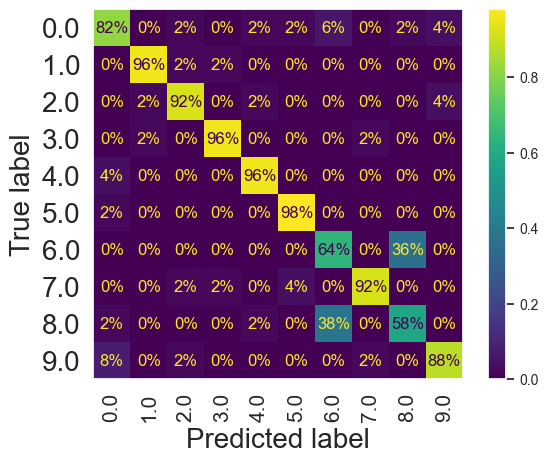

In [37]:

final_prediction=final_model.predict(test_set)
accuracy=accuracy_score(test_labels,final_prediction)
precision=precision_score(test_labels,final_prediction,average=None)
recall=recall_score(test_labels,final_prediction,average=None)

print("After prediction the scores are: ")
print("Accuracy is : "+ str(accuracy))
print("Precision is : "+ str(precision))
print("Recall is : "+ str(recall))
print('The confusion matrix is : ')  

plt.rc('font', size=12)

# Assuming you have defined `test_labels` and `final_prediction`

disp = ConfusionMatrixDisplay.from_predictions(test_labels, final_prediction,
                                               normalize="true", values_format=".0%",
                                               xticks_rotation='vertical')
plt.grid (False)
plt.xlabel("Predicted label", size=20)
plt.ylabel("True label", size=20)
plt.xticks(size=15)
plt.yticks(size=20)
# Set the colorbar numbers to a smaller size
cbar = disp.im_.colorbar
cbar.ax.tick_params(labelsize=10)
plt.show()

Saving the best model

In [38]:
joblib.dump(final_model, "Best_XGBClassifier.pkl")

['Best_XGBClassifier.pkl']

Loading the best model

In [39]:
final_model_reloaded = joblib.load("Best_XGBClassifier.pkl")
new_data = test_set.iloc[:5] 
predictions = final_model_reloaded.predict(new_data)
predictions

array([8, 4, 4, 0, 8], dtype=int64)

# Neural Networks

Taking a subset from the training set as a validation set by splitting the train set

In [40]:
train_set, valid_set, train_labels, valid_labels = train_test_split(train_set, train_labels, test_size=0.05, random_state=42,shuffle=True,
                                                    stratify=train_labels)

Building a sequential API

In [44]:
shutil.rmtree("my_checkpoints", ignore_errors=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
# define the model
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(256, input_dim=15, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="sigmoid"))#sigmoid for normalizing the the probabilities (=1)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               4096      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 47,658
Trainable params: 47,658
Non-trainable params: 0
_________________________________________________________________


Training on the built model

In [46]:
train = model.fit(train_set , train_labels , validation_data=(valid_set,valid_labels), batch_size=128,
                  epochs=100, verbose=1,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
22/34 [==================>...........] - ETA: 0s - loss: 16.8345 - accuracy: 0.0987  

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 4s 52ms/step - loss: 12.2037 - accuracy: 0.0999 - val_loss: 2.5166 - val_accuracy: 0.1422
Epoch 2/100
24/34 [====================>.........] - ETA: 0s - loss: 2.3571 - accuracy: 0.1178

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 38ms/step - loss: 2.3385 - accuracy: 0.1146 - val_loss: 2.3006 - val_accuracy: 0.1022
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 2.2914 - accuracy: 0.1069 - val_loss: 2.3044 - val_accuracy: 0.1022
Epoch 4/100
23/34 [===================>..........] - ETA: 0s - loss: 2.2902 - accuracy: 0.1063

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 24ms/step - loss: 2.2900 - accuracy: 0.1081 - val_loss: 2.2980 - val_accuracy: 0.1067
Epoch 5/100
24/34 [====================>.........] - ETA: 0s - loss: 2.2878 - accuracy: 0.1097

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 21ms/step - loss: 2.2869 - accuracy: 0.1102 - val_loss: 2.2824 - val_accuracy: 0.1111
Epoch 6/100
22/34 [==================>...........] - ETA: 0s - loss: 2.2819 - accuracy: 0.1293

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 21ms/step - loss: 2.2818 - accuracy: 0.1275 - val_loss: 2.2724 - val_accuracy: 0.1467
Epoch 7/100
23/34 [===================>..........] - ETA: 0s - loss: 2.2759 - accuracy: 0.1247

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 29ms/step - loss: 2.2765 - accuracy: 0.1207 - val_loss: 2.2712 - val_accuracy: 0.1200
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 2.2724 - accuracy: 0.1247 - val_loss: 2.2726 - val_accuracy: 0.1244
Epoch 9/100
29/34 [========================>.....] - ETA: 0s - loss: 2.2601 - accuracy: 0.1339

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 35ms/step - loss: 2.2624 - accuracy: 0.1329 - val_loss: 2.2677 - val_accuracy: 0.1067
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 2.2702 - accuracy: 0.1511 - val_loss: 2.3295 - val_accuracy: 0.1333
Epoch 11/100
25/34 [=====================>........] - ETA: 0s - loss: 2.2388 - accuracy: 0.1488

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 25ms/step - loss: 2.2310 - accuracy: 0.1539 - val_loss: 2.2316 - val_accuracy: 0.1511
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 2.2332 - accuracy: 0.1453 - val_loss: 2.2853 - val_accuracy: 0.1467
Epoch 13/100
22/34 [==================>...........] - ETA: 0s - loss: 2.2502 - accuracy: 0.1314

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 43ms/step - loss: 2.2399 - accuracy: 0.1301 - val_loss: 2.1538 - val_accuracy: 0.1956
Epoch 14/100
27/34 [======================>.......] - ETA: 0s - loss: 2.1723 - accuracy: 0.1913

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 25ms/step - loss: 2.1755 - accuracy: 0.1942 - val_loss: 2.0976 - val_accuracy: 0.2311
Epoch 15/100
34/34 [==============================] - 0s 3ms/step - loss: 2.1294 - accuracy: 0.2124 - val_loss: 2.0990 - val_accuracy: 0.2089
Epoch 16/100
15/34 [============>.................] - ETA: 0s - loss: 2.2087 - accuracy: 0.1651

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 22ms/step - loss: 2.1873 - accuracy: 0.1799 - val_loss: 2.0745 - val_accuracy: 0.2356
Epoch 17/100
28/34 [=======================>......] - ETA: 0s - loss: 2.0961 - accuracy: 0.2333

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 2s 48ms/step - loss: 2.0848 - accuracy: 0.2440 - val_loss: 1.9975 - val_accuracy: 0.2267
Epoch 18/100
19/34 [===============>..............] - ETA: 0s - loss: 2.0091 - accuracy: 0.2812

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 22ms/step - loss: 2.0240 - accuracy: 0.2699 - val_loss: 1.9271 - val_accuracy: 0.3067
Epoch 19/100
22/34 [==================>...........] - ETA: 0s - loss: 1.9681 - accuracy: 0.2908

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 23ms/step - loss: 1.9935 - accuracy: 0.2709 - val_loss: 1.8927 - val_accuracy: 0.2889
Epoch 20/100
34/34 [==============================] - 0s 5ms/step - loss: 1.9816 - accuracy: 0.2767 - val_loss: 1.9491 - val_accuracy: 0.2622
Epoch 21/100
34/34 [==============================] - 0s 5ms/step - loss: 1.9686 - accuracy: 0.2613 - val_loss: 1.9682 - val_accuracy: 0.2533
Epoch 22/100
34/34 [==============================] - 0s 5ms/step - loss: 1.9697 - accuracy: 0.2634 - val_loss: 2.0969 - val_accuracy: 0.2356
Epoch 23/100
33/34 [============================>.] - ETA: 0s - loss: 1.9441 - accuracy: 0.2760

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 39ms/step - loss: 1.9440 - accuracy: 0.2753 - val_loss: 1.8018 - val_accuracy: 0.3111
Epoch 24/100
24/34 [====================>.........] - ETA: 0s - loss: 1.8351 - accuracy: 0.3216

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 26ms/step - loss: 1.8590 - accuracy: 0.3064 - val_loss: 1.7908 - val_accuracy: 0.2844
Epoch 25/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8784 - accuracy: 0.2823 - val_loss: 1.7940 - val_accuracy: 0.3067
Epoch 26/100
23/34 [===================>..........] - ETA: 0s - loss: 1.8295 - accuracy: 0.2850

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 23ms/step - loss: 1.8002 - accuracy: 0.2926 - val_loss: 1.6207 - val_accuracy: 0.4222
Epoch 27/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8592 - accuracy: 0.3069 - val_loss: 1.8377 - val_accuracy: 0.3378
Epoch 28/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8486 - accuracy: 0.2795 - val_loss: 1.7027 - val_accuracy: 0.3067
Epoch 29/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8182 - accuracy: 0.2840 - val_loss: 1.7235 - val_accuracy: 0.3156
Epoch 30/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7830 - accuracy: 0.3102 - val_loss: 1.8806 - val_accuracy: 0.3022
Epoch 31/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7802 - accuracy: 0.3230 - val_loss: 1.8502 - val_accuracy: 0.2578
Epoch 32/100
25/34 [=====================>........] - ETA: 0s - loss: 1.7714 - accuracy: 0.3259

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 24ms/step - loss: 1.7605 - accuracy: 0.3294 - val_loss: 1.6139 - val_accuracy: 0.3333
Epoch 33/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7272 - accuracy: 0.3462 - val_loss: 1.9075 - val_accuracy: 0.2756
Epoch 34/100
20/34 [================>.............] - ETA: 0s - loss: 1.8210 - accuracy: 0.2848

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 22ms/step - loss: 1.7656 - accuracy: 0.3216 - val_loss: 1.4787 - val_accuracy: 0.4044
Epoch 35/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6006 - accuracy: 0.3689 - val_loss: 1.5271 - val_accuracy: 0.4178
Epoch 36/100
25/34 [=====================>........] - ETA: 0s - loss: 1.5696 - accuracy: 0.3934

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 2s 46ms/step - loss: 1.5649 - accuracy: 0.3960 - val_loss: 1.4448 - val_accuracy: 0.4044
Epoch 37/100
30/34 [=========================>....] - ETA: 0s - loss: 1.5044 - accuracy: 0.4234

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 23ms/step - loss: 1.5062 - accuracy: 0.4229 - val_loss: 1.3967 - val_accuracy: 0.4311
Epoch 38/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6682 - accuracy: 0.3530 - val_loss: 1.5363 - val_accuracy: 0.4133
Epoch 39/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6879 - accuracy: 0.3436 - val_loss: 1.5372 - val_accuracy: 0.3778
Epoch 40/100
24/34 [====================>.........] - ETA: 0s - loss: 1.5615 - accuracy: 0.4007

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 27ms/step - loss: 1.5466 - accuracy: 0.4009 - val_loss: 1.3708 - val_accuracy: 0.4000
Epoch 41/100
33/34 [============================>.] - ETA: 0s - loss: 1.5077 - accuracy: 0.4089

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 45ms/step - loss: 1.5040 - accuracy: 0.4103 - val_loss: 1.2959 - val_accuracy: 0.4844
Epoch 42/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4616 - accuracy: 0.4363 - val_loss: 1.8187 - val_accuracy: 0.3644
Epoch 43/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6531 - accuracy: 0.3656 - val_loss: 1.3594 - val_accuracy: 0.4622
Epoch 44/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5866 - accuracy: 0.3591 - val_loss: 1.5371 - val_accuracy: 0.3778
Epoch 45/100
34/34 [==============================] - 0s 4ms/step - loss: 1.4972 - accuracy: 0.4152 - val_loss: 1.3144 - val_accuracy: 0.4800
Epoch 46/100
34/34 [==============================] - 0s 4ms/step - loss: 1.4580 - accuracy: 0.4442 - val_loss: 1.5647 - val_accuracy: 0.3956
Epoch 47/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5745 - accuracy: 0.3892 - val_loss: 1.3192 - val_accuracy: 0.5067
Epoch 48/100
34/34

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 21ms/step - loss: 1.3980 - accuracy: 0.4711 - val_loss: 1.2834 - val_accuracy: 0.4444
Epoch 58/100
18/34 [==============>...............] - ETA: 0s - loss: 1.3473 - accuracy: 0.4970

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 24ms/step - loss: 1.3541 - accuracy: 0.4882 - val_loss: 1.1811 - val_accuracy: 0.5956
Epoch 59/100
21/34 [=================>............] - ETA: 0s - loss: 1.3483 - accuracy: 0.4978

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 26ms/step - loss: 1.3633 - accuracy: 0.4865 - val_loss: 1.1745 - val_accuracy: 0.5156
Epoch 60/100
22/34 [==================>...........] - ETA: 0s - loss: 1.3369 - accuracy: 0.4908

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 2s 49ms/step - loss: 1.3226 - accuracy: 0.4968 - val_loss: 1.1164 - val_accuracy: 0.5156
Epoch 61/100
34/34 [==============================] - 0s 3ms/step - loss: 1.3399 - accuracy: 0.4975 - val_loss: 1.2375 - val_accuracy: 0.4800
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 1.3181 - accuracy: 0.5029 - val_loss: 1.1474 - val_accuracy: 0.5422
Epoch 63/100
34/34 [==============================] - 0s 4ms/step - loss: 1.2919 - accuracy: 0.5249 - val_loss: 1.2223 - val_accuracy: 0.5511
Epoch 64/100
34/34 [==============================] - 0s 4ms/step - loss: 1.2675 - accuracy: 0.5324 - val_loss: 1.2466 - val_accuracy: 0.5422
Epoch 65/100
34/34 [==============================] - 0s 3ms/step - loss: 1.3271 - accuracy: 0.4915 - val_loss: 1.1783 - val_accuracy: 0.5200
Epoch 66/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2658 - accuracy: 0.5261 - val_loss: 1.1500 - val_accuracy: 0.5422
Epoch 67/100
25/34

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 25ms/step - loss: 1.2780 - accuracy: 0.5308 - val_loss: 1.1004 - val_accuracy: 0.5333
Epoch 68/100
34/34 [==============================] - 0s 4ms/step - loss: 1.2292 - accuracy: 0.5434 - val_loss: 1.1220 - val_accuracy: 0.5422
Epoch 69/100
34/34 [==============================] - 0s 5ms/step - loss: 1.3322 - accuracy: 0.5060 - val_loss: 1.2729 - val_accuracy: 0.5067
Epoch 70/100
34/34 [==============================] - 0s 6ms/step - loss: 1.3125 - accuracy: 0.5118 - val_loss: 1.1187 - val_accuracy: 0.5733
Epoch 71/100
34/34 [==============================] - ETA: 0s - loss: 1.2296 - accuracy: 0.5467

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 43ms/step - loss: 1.2296 - accuracy: 0.5467 - val_loss: 1.0440 - val_accuracy: 0.5689
Epoch 72/100
21/34 [=================>............] - ETA: 0s - loss: 1.2121 - accuracy: 0.5588

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 22ms/step - loss: 1.1906 - accuracy: 0.5630 - val_loss: 1.0368 - val_accuracy: 0.5733
Epoch 73/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1963 - accuracy: 0.5542 - val_loss: 1.0681 - val_accuracy: 0.5956
Epoch 74/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2682 - accuracy: 0.5179 - val_loss: 1.4632 - val_accuracy: 0.4978
Epoch 75/100
34/34 [==============================] - 0s 3ms/step - loss: 1.3244 - accuracy: 0.4966 - val_loss: 1.1346 - val_accuracy: 0.5733
Epoch 76/100
34/34 [==============================] - 0s 5ms/step - loss: 1.2212 - accuracy: 0.5467 - val_loss: 1.1174 - val_accuracy: 0.6222
Epoch 77/100
29/34 [========================>.....] - ETA: 0s - loss: 1.2029 - accuracy: 0.5574

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 2s 50ms/step - loss: 1.2008 - accuracy: 0.5567 - val_loss: 1.0215 - val_accuracy: 0.5644
Epoch 78/100
20/34 [================>.............] - ETA: 0s - loss: 1.1121 - accuracy: 0.5879

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 23ms/step - loss: 1.1340 - accuracy: 0.5808 - val_loss: 1.0105 - val_accuracy: 0.6489
Epoch 79/100
34/34 [==============================] - 0s 4ms/step - loss: 1.1554 - accuracy: 0.5682 - val_loss: 1.1133 - val_accuracy: 0.5467
Epoch 80/100
24/34 [====================>.........] - ETA: 0s - loss: 1.2749 - accuracy: 0.5290

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 23ms/step - loss: 1.2558 - accuracy: 0.5326 - val_loss: 0.9670 - val_accuracy: 0.6311
Epoch 81/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1234 - accuracy: 0.5764 - val_loss: 1.1693 - val_accuracy: 0.5644
Epoch 82/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1373 - accuracy: 0.5766 - val_loss: 1.0541 - val_accuracy: 0.5822
Epoch 83/100
25/34 [=====================>........] - ETA: 0s - loss: 1.1759 - accuracy: 0.5666

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 24ms/step - loss: 1.1780 - accuracy: 0.5621 - val_loss: 0.9486 - val_accuracy: 0.6356
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 1.1327 - accuracy: 0.5754 - val_loss: 0.9853 - val_accuracy: 0.6222
Epoch 85/100
34/34 [==============================] - 0s 5ms/step - loss: 1.1272 - accuracy: 0.5747 - val_loss: 1.2004 - val_accuracy: 0.5600
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 1.2052 - accuracy: 0.5495 - val_loss: 0.9688 - val_accuracy: 0.6089
Epoch 87/100
29/34 [========================>.....] - ETA: 0s - loss: 1.0966 - accuracy: 0.5849

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 43ms/step - loss: 1.1029 - accuracy: 0.5813 - val_loss: 0.9450 - val_accuracy: 0.6178
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0505 - accuracy: 0.6058 - val_loss: 0.9840 - val_accuracy: 0.5778
Epoch 89/100
26/34 [=====================>........] - ETA: 0s - loss: 1.0462 - accuracy: 0.6124

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 26ms/step - loss: 1.0455 - accuracy: 0.6110 - val_loss: 0.9189 - val_accuracy: 0.6178
Epoch 90/100
20/34 [================>.............] - ETA: 0s - loss: 1.0291 - accuracy: 0.6086

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 24ms/step - loss: 1.0328 - accuracy: 0.6143 - val_loss: 0.8988 - val_accuracy: 0.6578
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.6030 - val_loss: 0.9174 - val_accuracy: 0.6400
Epoch 92/100
34/34 [==============================] - 0s 4ms/step - loss: 1.0822 - accuracy: 0.5925 - val_loss: 1.0023 - val_accuracy: 0.5911
Epoch 93/100
24/34 [====================>.........] - ETA: 0s - loss: 1.0227 - accuracy: 0.6130

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 34ms/step - loss: 1.0075 - accuracy: 0.6131 - val_loss: 0.8498 - val_accuracy: 0.6711
Epoch 94/100
34/34 [==============================] - 0s 5ms/step - loss: 0.9916 - accuracy: 0.6274 - val_loss: 0.8730 - val_accuracy: 0.6578
Epoch 95/100
34/34 [==============================] - 0s 5ms/step - loss: 1.0585 - accuracy: 0.6005 - val_loss: 0.9717 - val_accuracy: 0.6622
Epoch 96/100
34/34 [==============================] - 0s 5ms/step - loss: 1.1074 - accuracy: 0.5890 - val_loss: 0.9181 - val_accuracy: 0.6533
Epoch 97/100
34/34 [==============================] - 0s 5ms/step - loss: 1.0262 - accuracy: 0.6152 - val_loss: 1.0359 - val_accuracy: 0.5822
Epoch 98/100
34/34 [==============================] - 0s 5ms/step - loss: 1.0266 - accuracy: 0.6115 - val_loss: 0.8908 - val_accuracy: 0.6578
Epoch 99/100
34/34 [==============================] - 0s 5ms/step - loss: 1.0152 - accuracy: 0.6140 - val_loss: 0.9190 - val_accuracy: 0.6756
Epoch 100/100
23/3

INFO:tensorflow:Assets written to: my_checkpoints\assets


INFO:tensorflow:Assets written to: my_checkpoints\assets


34/34 [==============================] - 1s 23ms/step - loss: 0.9794 - accuracy: 0.6304 - val_loss: 0.8378 - val_accuracy: 0.7067


In [47]:
train.params

{'verbose': 1, 'epochs': 100, 'steps': 34}

Showing the training curve during the epochs (loss vs Accuracy)

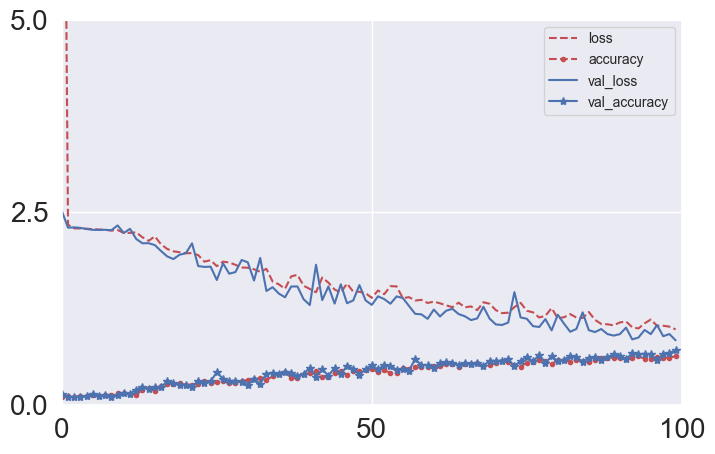

In [48]:
pd.DataFrame(train.history).plot(
    figsize=(8, 5), xlim=[0, 100], ylim=[0,5], grid=True,
    style=["r--", "r--.", "b-", "b-*"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="upper right",fontsize="10")  # extra code
plt.show()

As shown in the figure above the accuracy is low and the loss is high , so we need to do some tuning to the hyperparameters to get a better model

Predicting on the test set

In [49]:
model.evaluate(test_set,test_labels) 

16/16 [==============================] - 0s 2ms/step - loss: 1.1141 - accuracy: 0.5840


[1.1141482591629028, 0.5839999914169312]

Predicting on a small test set

In [50]:
X_new = test_set[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = y_proba.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 82ms/step


array([9, 9, 4], dtype=int64)

Fine-Tuning Neural Network Hyperparameters 

In [51]:
#Function to build the model
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=10, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=[ "adam" , "sgd"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
         
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,min_delta=0.01,restore_best_weights=True)
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="Downloads", project_name="my_rnd_search", seed=42)
random_search_tuner.search(train_set, train_labels, epochs=50,
                           validation_data=(valid_set, valid_labels),callbacks=[early_stopping_cb])

Trial 5 Complete [00h 00m 15s]
val_accuracy: 0.7333333492279053

Best val_accuracy So Far: 0.8844444155693054
Total elapsed time: 00h 00m 58s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Getting the best model and saving it in a variable

In [53]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [54]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 96,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'adam'}

In [55]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 96
learning_rate: 0.0012482904754698163
optimizer: adam
Score: 0.8844444155693054


Training the train set using the best model

In [56]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",save_best_only=True,)
best_model.fit(train_set, train_labels, epochs=30,callbacks=[checkpoint_cb])
test_loss, test_accuracy = best_model.evaluate(test_set, test_labels)

Epoch 1/30
114/134 [========================>.....] - ETA: 0s - loss: 0.5188 - accuracy: 0.7928WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 2s 2ms/step - loss: 0.5874 - accuracy: 0.7703
Epoch 2/30
133/134 [============================>.] - ETA: 0s - loss: 0.5431 - accuracy: 0.7824WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7829
Epoch 3/30
133/134 [============================>.] - ETA: 0s - loss: 0.4892 - accuracy: 0.8047WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.8044
Epoch 4/30
131/134 [============================>.] - ETA: 0s - loss: 0.5646 - accuracy: 0.7758WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7745
Epoch 5/30
126/134 [===========================>..] - ETA: 0s - loss: 0.4716 - accuracy: 0.8145WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8129
Epoch 6/30
111/134 [=======================>......] - ETA: 0s - loss: 0.4590 - accuracy: 0.8164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8178
Epoch 7/30
129/134 [===========================>..] - ETA: 0s - loss: 0.5226 - accuracy: 0.7892WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7897
Epoch 8/30
112/134 [========================>.....] - ETA: 0s - loss: 0.6668 - accuracy: 0.7405WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7527
Epoch 9/30
114/134 [========================>.....] - ETA: 0s - loss: 0.4687 - accuracy: 0.8109WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8096
Epoch 10/30
114/134 [========================>.....] - ETA: 0s - loss: 0.4857 - accuracy: 0.7996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7963
Epoch 11/30
114/134 [========================>.....] - ETA: 0s - loss: 0.5034 - accuracy: 0.8004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7995
Epoch 12/30
134/134 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.8089WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8089
Epoch 13/30
110/134 [=======================>......] - ETA: 0s - loss: 0.4522 - accuracy: 0.8193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8194
Epoch 14/30
113/134 [========================>.....] - ETA: 0s - loss: 0.4866 - accuracy: 0.7962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.8000
Epoch 15/30
133/134 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.7787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7787
Epoch 16/30
131/134 [============================>.] - ETA: 0s - loss: 0.4776 - accuracy: 0.8051WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8037
Epoch 17/30
119/134 [=========================>....] - ETA: 0s - loss: 0.4869 - accuracy: 0.8012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.8012
Epoch 18/30
126/134 [===========================>..] - ETA: 0s - loss: 0.4736 - accuracy: 0.8100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8103
Epoch 19/30
122/134 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.8217WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8213
Epoch 20/30
111/134 [=======================>......] - ETA: 0s - loss: 0.4246 - accuracy: 0.8238WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.8077
Epoch 21/30
133/134 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7852WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7850
Epoch 22/30
118/134 [=========================>....] - ETA: 0s - loss: 0.4258 - accuracy: 0.8289WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8262
Epoch 23/30
132/134 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.8054WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.8058
Epoch 24/30
114/134 [========================>.....] - ETA: 0s - loss: 0.6088 - accuracy: 0.7728WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7752
Epoch 25/30
120/134 [=========================>....] - ETA: 0s - loss: 0.4926 - accuracy: 0.7971WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8026
Epoch 26/30
134/134 [==============================] - ETA: 0s - loss: 0.4316 - accuracy: 0.8243WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8243
Epoch 27/30
117/134 [=========================>....] - ETA: 0s - loss: 0.4279 - accuracy: 0.8301WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8201
Epoch 28/30
108/134 [=======================>......] - ETA: 0s - loss: 0.4736 - accuracy: 0.8079WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8077
Epoch 29/30
 99/134 [=====================>........] - ETA: 0s - loss: 0.4671 - accuracy: 0.8100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


134/134 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8138
Epoch 30/30
133/134 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.8043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


16/16 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8280


Testing the test set using the best model

In [57]:
best_model.evaluate(test_set,test_labels) 

16/16 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8280


[0.4676458537578583, 0.828000009059906]

In [58]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 96)                1536      
                                                                 
 dense_1 (Dense)             (None, 96)                9312      
                                                                 
 dense_2 (Dense)             (None, 96)                9312      
                                                                 
 dense_3 (Dense)             (None, 96)                9312      
                                                                 
 dense_4 (Dense)             (None, 96)                9312      
                                                                 
 dense_5 (Dense)             (None, 96)                9

Saving the best model

In [59]:
shutil.rmtree("best_keras", ignore_errors=True)
best_model.save("best_keras", save_format="tf")

INFO:tensorflow:Assets written to: best_keras\assets


INFO:tensorflow:Assets written to: best_keras\assets


Loading and testing the model

In [60]:
model = tf.keras.models.load_model("best_keras")
X_new = test_set[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = y_proba.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 82ms/step


array([8, 4, 4], dtype=int64)